<a href="https://www.kaggle.com/code/gregoryoliveira/greg-kaggle-metabook?scriptVersionId=105702183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0. Summary

- Purpose: automate the visualization/access to my portfolio kernels;

- Main question: is it possible to use Kaggle's metadata for a better presentation of the kernel portfolio?;

- Techniques: data vizualization, and data scraping;

- Language: python;

- Libraries: pandas, seaborn, matplotlib, scrapy, request;

# 1. Introduction

For me as a newbie, considering the fantastic things that we can do with python and its ecosystem, every time that I need to update my portfolio because I coded a new notebook, sounds a little bit counterproductive. On my way to becoming a data scientist, I learned about web scraping, and I was wondering why I do not use it to make my life easier. My first thought was to scrap my own Kaggle profile and store the data in a dataset.

However, Kaggle was faster (or me slower? lol), and they already made available the Meta Kaggle: a tremendous dataset with much information about users, competitions, kernels, and some more information. however, when you build a portfolio, it is important to write some quick information about each piece of your work, and now the web scraping methods raise to help me! I am including in each of my notebooks a first hide part (0. Summary) where I will store the following information:

- Purpose:
- Main question:
- Techniques:
- Language:
- Libraries:

I inspire myself to create this summary on the session training with [Andrew Jones](https://www.linkedin.com/in/andrew-jones-dsi/), where he presents his data science program and other great tips.

So, this notebook will pick my information at Meta Kaggle, scrap my notebooks to find the hide section, and then present the results here. I can explore more information about my presence on Kaggle (a medals timeline maybe?), but I have other projects to finish first!

# 2. Methodology

To analyze and present the data about my kernels, I will use pandas, matplotlib, and seaborn. To keep my code as better as possible, I will also use the nbpep8, a package designed to allow us to use the pycodestyle on Kaggle. There are many packages to scrap data using python. I will use the scrapy. Beyond that, I will standardize some information inside my kernels. First, I will the first Markdown cell and call it 0. Summary. And I will always use the last plot as my cover image.

And, before we go, I will schedule this notebook to run once a week to maintain the information updated!

# 3. Development

## 3.1 Meta Kaggle Dataset

Let's begin our journey by working on the Meta Kaggle dataset. To begin properly, we need the account id. You can find it in your profile section, or you can find it on the dataset. I believe that the easier way is @ https://www.kaggle.com/gregoryoliveira/account.

Now let’s use our hands! Ower two first steps are: find our kernels and find the upvotes on our kernel! However, we will first define the `kernels_votes` and then we will define the `kernels` dataset.

In [1]:
"""Using pycodestyle + bnpep8 to analyze me code.
You can see more information at https://github.com/nbpep8/nbpep8 or
https://www.kaggle.com/code/debanga/kaggle-pep8-test/notebook
---
I will delete the pep8(_ih) function after fix all recommends.
This is my first time using this package.
"""
!pip install scrapy
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

import os
import re
import scrapy
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from nbpep8.nbpep8 import pep8
import matplotlib.pyplot as plt
from scrapy.crawler import CrawlerProcess
from IPython.display import display, Markdown, Image, HTML

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.5/264.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.6/93.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 5.3 MB/s eta 0:00:00
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11958 sha256=55b19d9fd110540b3ee54a0dafc7422b5d1ac8fc3dc5775f0b2bd526f80eb0e2
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher
Looking in indexes: https://test.pypi.org/simple/


In [2]:
from matplotlib import rcParams

# To remove rcParams
plt.rcdefaults()

# And now define the most used
rcParams['figure.dpi'] = 100
# rcParams['figure.figsize'] = 14, 1.75
rcParams['figure.autolayout'] = True
rcParams["axes.spines.top"] = False
rcParams["axes.spines.left"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.spines.bottom"] = False
# rcParams['axes.titlelocation'] = 'left'
rcParams["ytick.left"] = False
rcParams["ytick.labelleft"] = False
rcParams["xtick.bottom"] = False
rcParams["xtick.labelbottom"] = False

In [3]:
autor_user_id = 8176853
autor_user_name = "gregoryoliveira"
url_kaggle = "https://www.kaggle.com/"

# Loading data to create the kernels_votes dataframe
def load_metadata(autor_user_id: int) -> pd.DataFrame:
    kernels = pd.read_csv("../input/meta-kaggle/Kernels.csv")

    kernels = kernels[kernels["AuthorUserId"] == autor_user_id]

    kernel_versions = pd.read_csv("../input/meta-kaggle/KernelVersions.csv")

    kernel_versions = kernel_versions.loc[
        kernel_versions["AuthorUserId"] == autor_user_id, ["Id", "ScriptId", "Title"]]

    kernels_votes = pd.read_csv("../input/meta-kaggle/KernelVotes.csv")

    kernels_votes = pd.merge(
        left=kernel_versions,
        right=kernels_votes,
        left_on="Id",
        right_on="KernelVersionId",
        how="inner")

    kernels_votes = kernels_votes.loc[:, ["ScriptId", "Title", "VoteDate"]]

    kernels_votes["VoteDate"] = kernels_votes["VoteDate"].astype("datetime64")

    # Creating the kernels dataframe
    mask_dates = [col for col in list(kernels.columns) if col.find("Date") != -1]

    kernels[mask_dates] = kernels[mask_dates].astype("datetime64")

    kernels["CreationDate"] = kernels["CreationDate"].dt.date

    mask = ["Id", "CurrentUrlSlug"] + mask_dates + ["Medal", "TotalVotes"]

    kernels = kernels.loc[:, mask]
    
    kernels["KernelURL"] = url_kaggle +"code/" + autor_user_name + "/" + kernels["CurrentUrlSlug"]
    
    return kernels_votes, kernels

If you like to see the partial results, they are hidden in the next cell. 

In [4]:
kernels_votes, kernels = load_metadata(autor_user_id=8176853)

In [5]:
kernels_votes.to_csv("kernel_votes.csv", index=False)

kernels_votes.head(3)

,ScriptId,Title,VoteDate
0,21663427,Solar Power Generation Data,2021-11-06
1,21663427,Solar Power Generation Data,2021-11-02
2,21663427,Solar Power Generation Data,2021-11-01


In [6]:
kernels.head(3)

,Id,CurrentUrlSlug,CreationDate,EvaluationDate,MadePublicDate,MedalAwardDate,Medal,TotalVotes,KernelURL
584662,21663427,solar-power-generation-data,2021-10-31,2021-11-10,2021-10-31,2022-04-29,3.0,11,https://www.kaggle.com/code/gregoryoliveira/so...
705854,25960126,datacamp-drinks-promotions,2022-04-02,2022-09-01,2022-04-03,2022-09-01,3.0,7,https://www.kaggle.com/code/gregoryoliveira/da...
709443,26184844,titanic-ml-from-disaster,2022-04-11,2022-05-20,2022-04-20,2022-05-18,3.0,11,https://www.kaggle.com/code/gregoryoliveira/ti...


## 3.2 Webscraping at Kaggle Notebooks

Before we start this section, it is important to say that web scraping is a great and powerful tool for a data scientist. There are many things to pay attention to. I truly believe that each website will present some challenges to find the information that you need. Stackoverflow was a great help to understand better how to deal with this task. Let's talk more and type more, now things will get more interesting! :-)

In [7]:
# Downloading file
def download_url(url, save_path, chunk_size=128):
    """This function will be use to download
    the cover image to the notebook. This will be used
    instead of the address to reduce trafic at Kaggle
    website.
    """
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

# Defening the function that will scrap the data
def scrap_nb(url: str, nb_cols: int) -> None:
    """This function will collect the summaries from notebook and
    the last plot address to use it as the notebook cover on my
    portifolio.
    Before we go, here other ways to scrap data, i.e. with Spider class.
    However, apparently Kaggle does not allow this. Well, considering
    that I need just a few information for each notebook, I will build
    a for loop.
    """
    # Visiting the notebook fisrt page
    html = str(requests.get(url).content)
    html_clean = html.replace('\"', '')
    url_code = re.findall(r"renderedOutputUrl:(.*),isolatorResults", html_clean)[0]

    # Visiting the notebook actual content
    html = requests.get(url_code).content
    sel = scrapy.Selector(text=html)
    sel_info = sel.xpath('//ul').extract_first()
    
    # Cleaning the results
    if sel_info is None:
        # If we dont have results, fill with NaN
        nb_infos = [np.NaN] * nb_cols
    else:
        nb_infos = re.findall(r": (.*);", sel_info)
        # If the number of elements is different then 5
        if len(nb_infos) != 5:
            nb_infos = [np.NaN] * nb_cols
    
    # Finding the plot results
    imgs = sel.css("img::attr(src)").extract()
    if len(imgs) > 0:
        url_img = re.sub(r"__res.+true", imgs[-1], url_code)
        nb_img = url_img
        # Download the cover plot
        download_url(nb_img, "notebook_img.png")
    else:
        # Creating a empty file for notebooks without plots
        with open("notebook_img.png", 'w') as fp:
            pass
        nb_img = np.NaN
        
    return nb_infos, nb_img

We have the function to scrap one notebook. Now, let's create a function to scrap many notebooks.

In [8]:
def kaggle_scrap(
    urls_list: list,
    nb_sum_cols: list,
    df_kernels: pd.DataFrame) -> pd.DataFrame:
    """This function will scrap notebooks and
    download the last image to use as cover
    on the portfolios notebooks.
    """
    # Creating dictionaries to receive data
    nb_summary = {}
    nb_imgs = {}
    
    nb_cols = len(nb_sum_cols)
    
    # Scraping using our function
    for i, url in enumerate(urls_list, 1):
        print(f"Scraping {i:03d} from {len(urls_list):03d}")
        nb_infos, nb_img = scrap_nb(url, nb_cols=nb_cols)
        nb_summary[url] = nb_infos
        nb_path = f"./notebook_{i:03d}.png"
        nb_imgs[url] = [nb_img, nb_path]
        os.rename("notebook_img.png", nb_path)

    df = pd.merge(
        left=df_kernels,
        right=pd.DataFrame.from_dict(
            nb_summary,
            orient='index',
            columns=nb_sum_cols),
        left_on="KernelURL",
        right_index=True
        )

    df = pd.merge(
        left=df,
        right=pd.DataFrame.from_dict(
            nb_imgs,
            orient='index',
            columns=["ImgSrc", "ImgPath"]),
        left_on="KernelURL",
        right_index=True)
    
    return df

Let's use our function. The results will be hidden, but you can see them!

In [9]:
# Defining where we will scrap
urls_list = kernels["KernelURL"].to_list()
nb_sum_cols = ["Purpose", "Question", "Techniques", "Language", "Libraries"]

kernels_summaries = kaggle_scrap(
    urls_list=urls_list,
    nb_sum_cols=nb_sum_cols,
    df_kernels=kernels)

Scraping 001 from 011
Scraping 002 from 011
Scraping 003 from 011
Scraping 004 from 011
Scraping 005 from 011
Scraping 006 from 011
Scraping 007 from 011
Scraping 008 from 011
Scraping 009 from 011
Scraping 010 from 011
Scraping 011 from 011


In [10]:
kernels_summaries.to_csv("kernel_votes.csv", index=False)

kernels_summaries.head(3)

,Id,CurrentUrlSlug,CreationDate,EvaluationDate,MadePublicDate,MedalAwardDate,Medal,TotalVotes,KernelURL,Purpose,Question,Techniques,Language,Libraries,ImgSrc,ImgPath
584662,21663427,solar-power-generation-data,2021-10-31,2021-11-10,2021-10-31,2022-04-29,3.0,11,https://www.kaggle.com/code/gregoryoliveira/so...,NaN,NaN,NaN,NaN,NaN,https://www.kaggleusercontent.com/kf/79226880/...,./notebook_001.png
705854,25960126,datacamp-drinks-promotions,2022-04-02,2022-09-01,2022-04-03,2022-09-01,3.0,7,https://www.kaggle.com/code/gregoryoliveira/da...,identify products/regions with the same sales ...,what drinks and regions shows the same behavio...,"hierarchical clustering, and data visualization",R,"tidyverse, and patchwork",https://www.kaggleusercontent.com/kf/105701628...,./notebook_002.png
709443,26184844,titanic-ml-from-disaster,2022-04-11,2022-05-20,2022-04-20,2022-05-18,3.0,11,https://www.kaggle.com/code/gregoryoliveira/ti...,NaN,NaN,NaN,NaN,NaN,NaN,./notebook_003.png


Well, now we have all data to create our portfolio dashboard!

## 3.3 Data Vizualization

We are ready to begin the cool part: creating data visualizations! You should hear that sometimes less is more, well, let's create a timeline for each notebook. To accomplish this, we will first create a function to filter data for a single kernel.

In [11]:
def df_kernel_line(
        df_kernels: pd.DataFrame,
        df_kernels_votes: pd.DataFrame,
        kernel_id: int) -> pd.DataFrame:
    """This function will generate the dataframes
    to plot the timeline for one kernel.
    """
    # Votes dataframe
    df_votes = df_kernels_votes.copy()
    df_votes = df_votes.loc[df_votes["ScriptId"] == kernel_id, :]
    df_votes.sort_values("VoteDate", inplace=True)

    nb_title = str(df_votes.iloc[-1, 1])
    
    df_votes.loc[:, "Votes"] = 1
    df_votes = df_votes.groupby("VoteDate", as_index=False)[["Votes"]].agg("sum")
    df_votes["TotalVotes"] = df_votes["Votes"].cumsum()
    df_votes.dropna(inplace=True)
    
    # Kernel information
    df_dates = df_kernels.copy()
    df_dates = df_dates.loc[df_dates["Id"] == kernel_id]
    
    df_dates.drop(["TotalVotes", "KernelURL"], axis=1, inplace=True)
    
    nb_url = df_dates.iloc[0,1]
    
    df_dates = pd.melt(
        df_dates,
        id_vars=["Id", "CurrentUrlSlug", "Medal"],
        var_name="Event",
        value_name="VoteDate")
    
    df_dates.sort_values("VoteDate", inplace=True, ignore_index=True)
    
    df_dates.dropna(subset=["VoteDate"], inplace=True)
    
    df_dates["Annotation"] = df_dates["Event"].str.replace("Date", "") + "\n@" + df_dates["VoteDate"].astype(str)
    
    return nb_title, nb_url, df_votes, df_dates

Now let's create a function to show each plot!

In [12]:
# Dictionaries to select markers and colors
plot_markers = {
    'CreationDate':"X",
    'MadePublicDate':"^",
    'Votes':".",
    'EvaluationDate':">",
    'MedalAwardDate':"o"
}

plot_colors = {
    'CreationDate':"#7D9AAA",
    'MadePublicDate':"#006298",
    'Votes':"k",
    'EvaluationDate':"#004165",
    'MedalAwardDate':"k"
}

medal_colors = {
    1:["#AD7615", "#FFD448"],
    2:["#838280", "#E9E9E9"],
    3:["#8E5B3D", "#F0BA7C"]
}

# css to better viz
css_details = "color:white;display:fill;border-radius:8px;" \
          "background-color:"

In [13]:
def plot_kernel_line(
    kernel_id: int,
    indice: str = None) -> None:
    """This function will plot a painel
    for a given notebook
    """
    # Loading dataframes and informations
    nb_title, nb_url, df_votes, df_dates = df_kernel_line(
            df_kernels=kernels,
            df_kernels_votes=kernels_votes,
            kernel_id=kernel_id)
    
    # Creating the plot
    fig, ax = plt.subplots()
    
    # Vote points
    sns.scatterplot(
        data=df_votes,
        x="VoteDate",
        y=0,
        size="Votes",
        color="k",
        ax=ax,
        legend=False)
    
    # Line base
    dt_start = df_dates.iloc[0, 4]
    dt_end = pd.concat([df_dates["VoteDate"], df_votes["VoteDate"]]).max()
    plt.hlines(y=0, xmin=dt_start, xmax=dt_end, color="#BCBDBC", zorder=0)
    
    # Points and Annotations
    for index, row in df_dates.iterrows():
        # Choosing the marker style
        if row["Event"] == "MedalAwardDate":    
            filled_marker_style = dict(
                marker=plot_markers[row["Event"]],
                linestyle=':',
                markersize=15,
                markerfacecolor=medal_colors[row["Medal"]][0],
                markerfacecoloralt=medal_colors[row["Medal"]][1],
                markeredgecolor=medal_colors[row["Medal"]][0],
                fillstyle="bottom")
        else:
            filled_marker_style = dict(
                marker=plot_markers[row["Event"]],
                linestyle=':',
                markersize=10,
                color=plot_colors[row["Event"]],
                fillstyle="full")

        # Points
        ax.plot(
            row["VoteDate"], 0,
            **filled_marker_style)

        # Anottations
        ax.annotate(
            row["Annotation"],
            xy=(row["VoteDate"], 0),
            textcoords='offset points',
            xytext=(-15 if index < 2 else 15, 15*(index+3)*(-1)**index),
            horizontalalignment='left' if index > 1 else 'right',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10",
                            color=plot_colors[row["Event"]]))  

    # Total Votes Annotation
    ax.annotate(
        f"TotalVotes = {df_votes.iloc[-1, -1]}\nLast@{df_votes.iloc[-1, 0].strftime('%Y-%m-%d')}",
        xy=(df_votes.iloc[-1, 0], 0),
        textcoords='offset points',
        xytext=(-15, -45),
        horizontalalignment='right',
        zorder=7,
        arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"),
        bbox={'facecolor': 'white', 'alpha': 0.9, 'edgecolor': 'white'})

    ax.set_xlabel("")
    
    # Create the title
    if indice is not None:
        str_indice = indice + " "
    else:
        str_indice = ""
    
    nb_access = f'<strong>Access the notebook:</strong> <a href="{url_kaggle}code/{autor_user_name}/{nb_url}">here</a>.'
    
    display(HTML(f"<h2>{str_indice}{nb_title}</h2>"))
    display(HTML(f'<p style="{css_details}#006298"><strong>Notebook Timeline</p></strong>'))

    plt.show()
    
    # Showing portifolio information
    df_summary = pd.melt(kernels_summaries.loc[kernels_summaries["Id"] == kernel_id, nb_sum_cols])
    img_cover = kernels_summaries.loc[kernels_summaries["Id"] == kernel_id, "ImgPath"].to_list()[0]
    
    if df_summary.isna().sum().sum() != 0:
        display(HTML(f'<p>{nb_access}</strong>'))
    else:
        df_summary["Info"] = "<p><strong>" + df_summary["variable"] + "</strong>: " + df_summary["value"] + ".</p>"
        display(HTML(f"""<p style="{css_details}#004165"><strong>Notebook Summary</p></strong>
                         <table>
                            <tr>
                                <td style="width:60%">
                                    {df_summary["Info"].str.cat()}
                                    <p>{nb_access}</p>
                                </td>
                                <td style="width:40%"><img src="{img_cover}"></td>
                            </tr>
                        </table>"""))

We are all ready to see all my Kaggle work. There is one notebook panel hidden on the next output cell, in case you are curious!

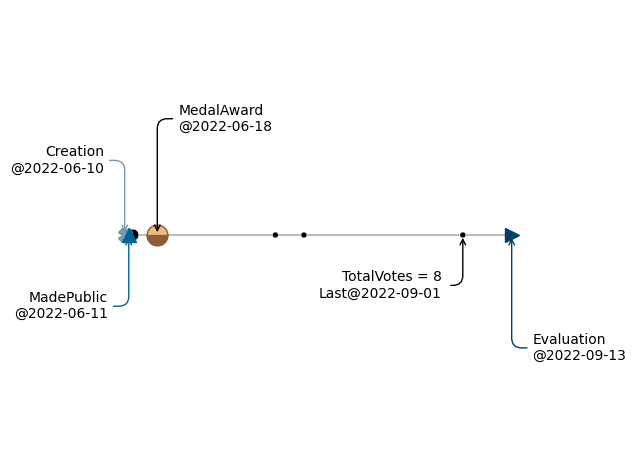

In [14]:
plot_kernel_line(27836568)

Well done! Now, we just need to iterate using the function that we coded.

# 4. Results

Now it is time to see what I have done here! 

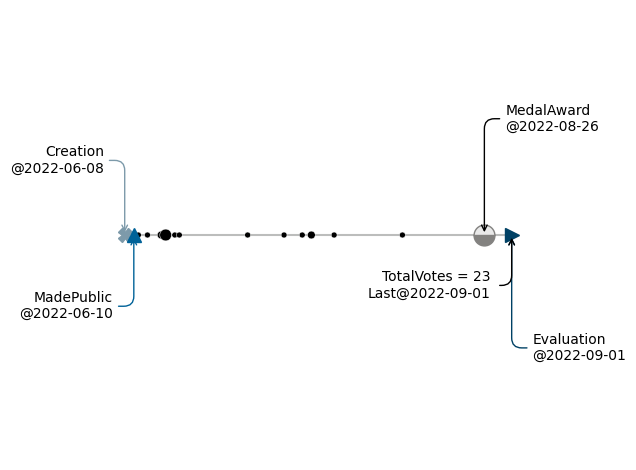

"Purpose: compare the climate change between two Brazilian cities with automatic weather station running.Question: is clima changing equally between two Brazilian cities?.Techniques: exploratory data analysis, data vizualization, storytelling, and statistical test.Language: python.Libraries: pandas, seaborn, matplotlib, plotly, and scipy. Access the notebook: here.",


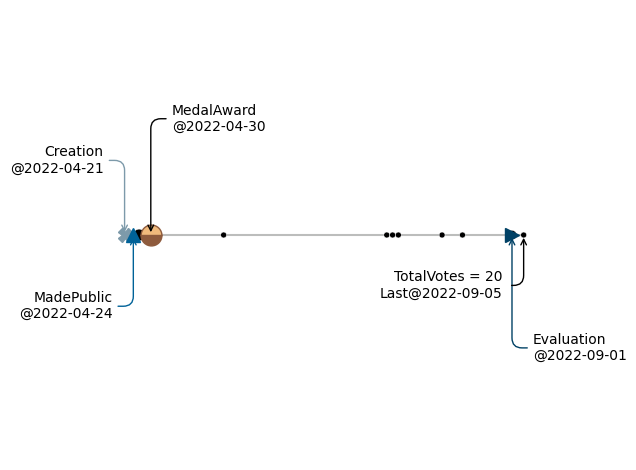

"Purpose: identify pattern on casual riders to convert them into members riders.Question: what can we do to maximize the number of rider members?.Techniques: exploratory data analysis, data vizualization, time series analysis, and linear regression.Language: R.Libraries: tidyverse, tidymodels, modelr, and patchwork. Access the notebook: here.",


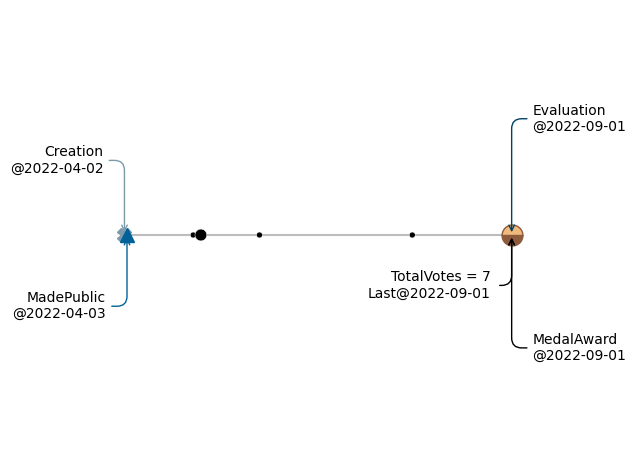

"Purpose: identify products/regions with the same sales behavior as a given product/region to mimic the results of a successful promotion.Question: what drinks and regions shows the same behavior than Wine at Saint Peterburg?.Techniques: hierarchical clustering, and data visualization.Language: R.Libraries: tidyverse, and patchwork. Access the notebook: here.",


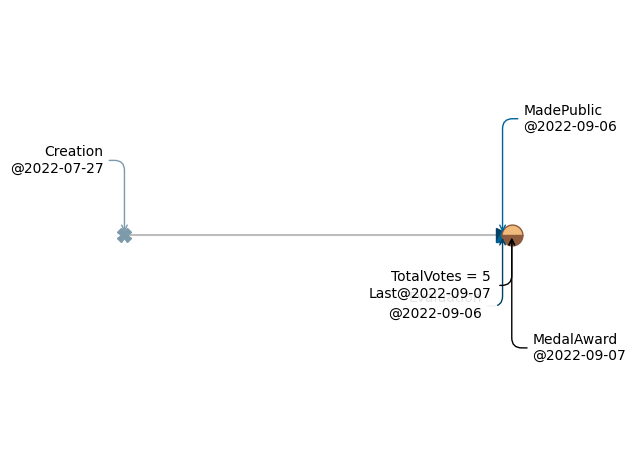

"Purpose: impute missing values in automatic weather stations from Brazilian cities around the country.Question: is it possible to impute weather data?.Techniques: exploratory data analysis, data vizualization, storytelling, timeseries analysis, and data imputation.Language: python.Libraries: pandas, seaborn, matplotlib, and scikit-learn. Access the notebook: here.",


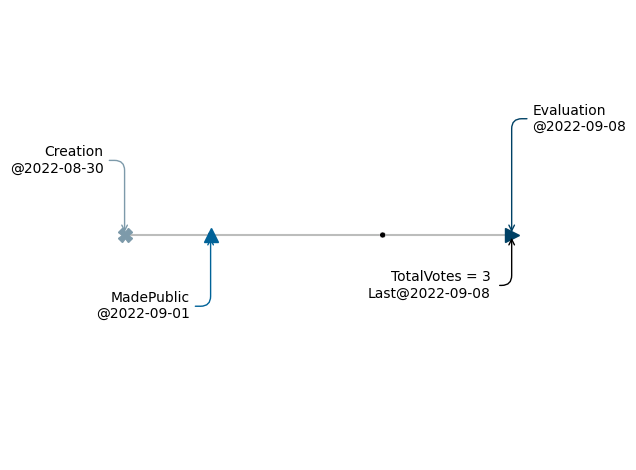

"Purpose: automate the visualization/access to my portfolio kernels.Question: is it possible to use Kaggle's metadata for a better presentation of the kernel portfolio?.Techniques: data vizualization, and data scraping.Language: python.Libraries: pandas, seaborn, matplotlib, scrapy, request. Access the notebook: here.",


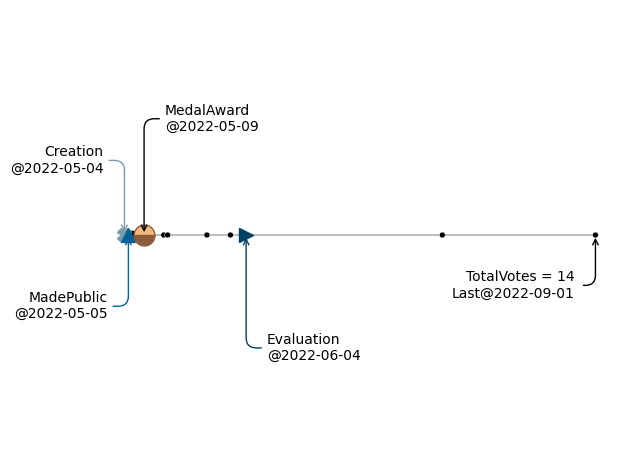

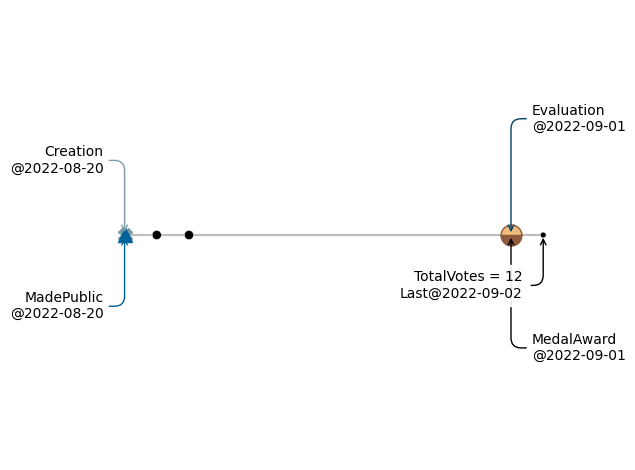

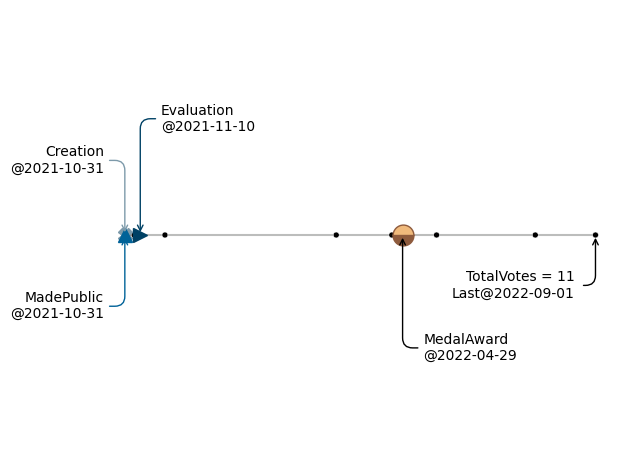

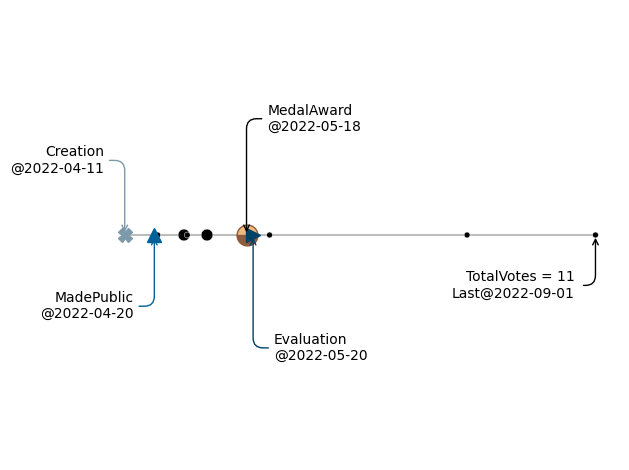

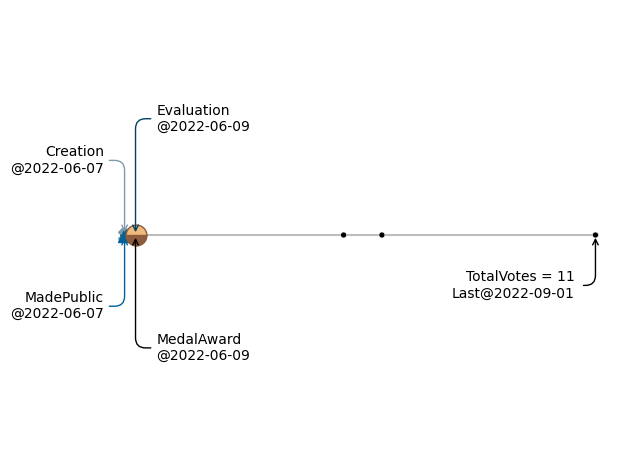

In [15]:
# Selecting the notebooks to show
# All portfolio notebooks and my 5 best votes
list_portfolio = kernels_summaries.dropna(subset=nb_sum_cols) \
        .sort_values(["Medal", "TotalVotes"],
                     ascending=[True, False])["Id"].to_list()

list_remain = kernels_summaries[~kernels_summaries["Id"].isin(list_portfolio)] \
        .sort_values(["Medal", "TotalVotes"],
                     ascending=[True, False])["Id"].to_list()[:5]

list_kernels = list_portfolio + list_remain

for i, id in enumerate(list_kernels, 1):
    indice = f"4.{i}"
    plot_kernel_line(id, indice=indice)

# 5. Discussion

Well, we see that with some lines, we can create amazing things using python. Some other skills are also important as HTML, CSS, and storytelling. Another important keynote is: as data (put here the role that you want: scientist, analyst, engineer, enthusiast, evangelist, associate, and ...) you need to always think how to automatize your process. Never be lazy on this! Back in my Microsoft Excel days (where I return sometimes), this save me a lot of time and after I began with this I never stop!

# 6. Final notes

Before I leave, I would like to thanks two Brazilian Kaggle fellows: [Jonas Neri](https://www.kaggle.com/jonaslneri), and [Marília Prata](https://www.kaggle.com/mpwolke). Jonas was the first data scientist who talks with me about this great and big data science world. He always gives me some tips and advice (including the structure of this notebook!). And Marília is an inspiring girl! She is everywhere here and always giving us the best tips and comments. I hope one day I may be like her. :-)

And, if you like this notebook, please, give me your vote and your comment. If you fork it, tag me in your notebook so I can see the improvements you've made, and I can also improve my notebook.
